<a href="https://colab.research.google.com/github/Raushan787/Oil-and-gas-data-analysis/blob/main/Electricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
#Load Dataset

df = pd.read_csv("household_power_consumption.csv")

In [22]:
#Load Dataset

df = pd.read_csv("household_power_consumption.csv")
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [23]:
# Convert Date + Time into datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
df.head()

/tmp/ipython-input-1346778271.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0,2007-01-01 00:00:00
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0,2007-01-01 00:01:00
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0,2007-01-01 00:02:00
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0,2007-01-01 00:03:00
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0,2007-01-01 00:04:00


In [24]:
# Convert numeric columns
numeric_cols = ['Global_active_power','Global_reactive_power','Voltage',
                'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [26]:
# Drop rows with missing datetime
df = df.dropna(subset=['Datetime'])
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00
1,1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00
2,2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00
3,3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00
4,4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00


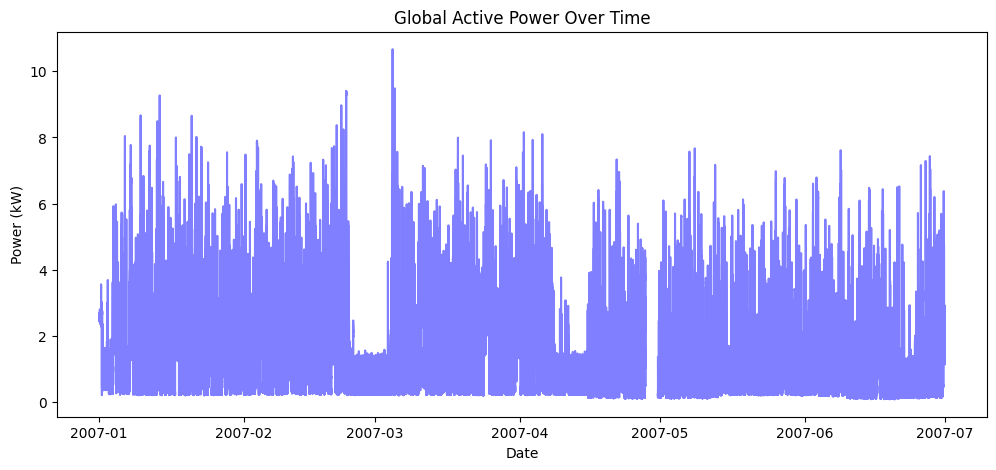

In [8]:
 #Exploratory Data Analysis (Quick)

plt.figure(figsize=(12,5))
plt.plot(df['Datetime'], df['Global_active_power'], color='blue', alpha=0.5)
plt.title("Global Active Power Over Time")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.show()

In [9]:

#  Feature Engineering

# Aggregate to daily average
df_daily = df.resample('D', on='Datetime').mean(numeric_only=True).reset_index()

# Add lag features (previous 1,2,3 days)
df_daily['lag1'] = df_daily['Global_active_power'].shift(1)
df_daily['lag2'] = df_daily['Global_active_power'].shift(2)
df_daily['lag3'] = df_daily['Global_active_power'].shift(3)

# Add rolling average (7 days)
df_daily['rolling7'] = df_daily['Global_active_power'].rolling(window=7).mean()

# Add day of week
df_daily['day_of_week'] = df_daily['Datetime'].dt.dayofweek

# Drop rows with NaN (from lag/rolling)
df_daily = df_daily.dropna()

In [10]:
#  Train-Test Split

X = df_daily[['lag1','lag2','lag3','rolling7','day_of_week']]
y = df_daily['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [11]:
#  Train Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Evaluate Model

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.23363303078299597
Root Mean Squared Error (RMSE): 0.28232687211262614


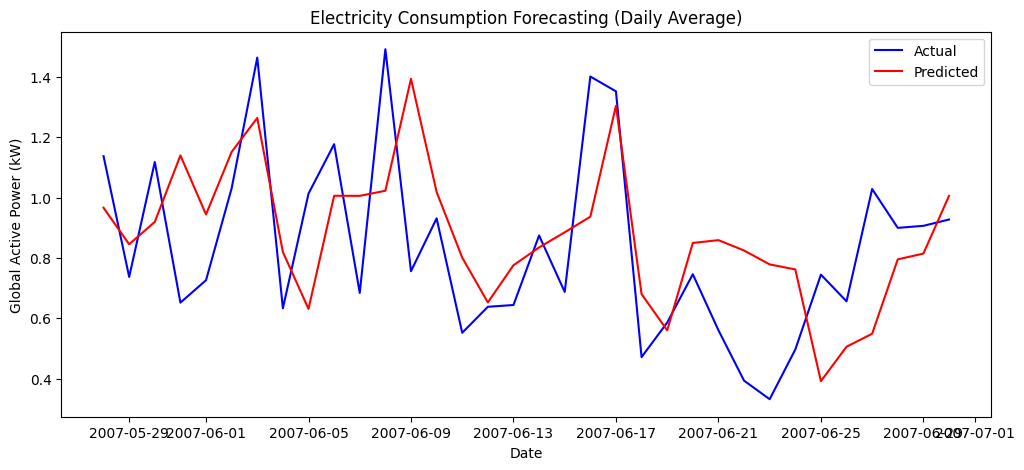

In [14]:
# Plot Actual vs Predicted

plt.figure(figsize=(12,5))
plt.plot(df_daily['Datetime'].iloc[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(df_daily['Datetime'].iloc[-len(y_test):], y_pred, label='Predicted', color='red')
plt.title("Electricity Consumption Forecasting (Daily Average)")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=200,     # number of trees
    max_depth=10,         # limit depth to avoid overfitting
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



In [16]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest MAE: 0.20609567244115318
Random Forest RMSE: 0.2558170487388896


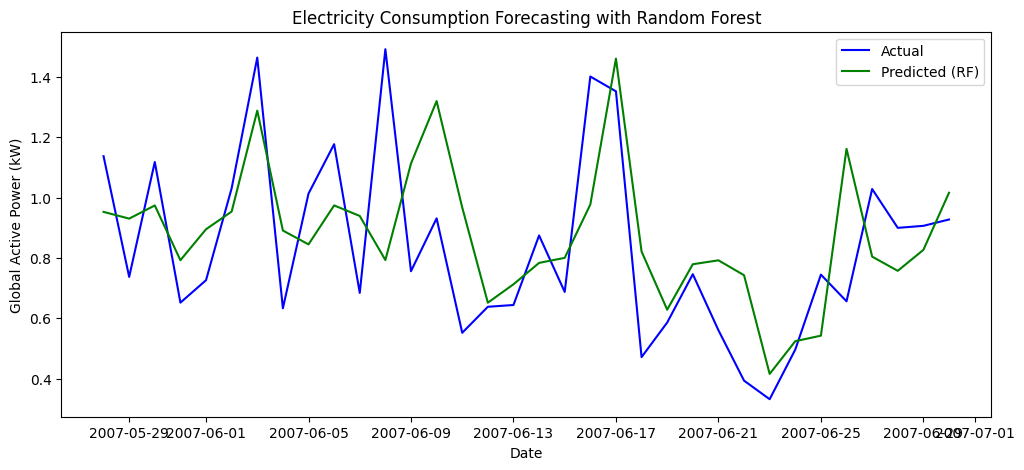

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df_daily['Datetime'].iloc[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(df_daily['Datetime'].iloc[-len(y_test):], y_pred_rf, label='Predicted (RF)', color='green')
plt.title("Electricity Consumption Forecasting with Random Forest")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()

In [18]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [19]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost MAE: 0.19730418883468537
XGBoost RMSE: 0.25888860502838046


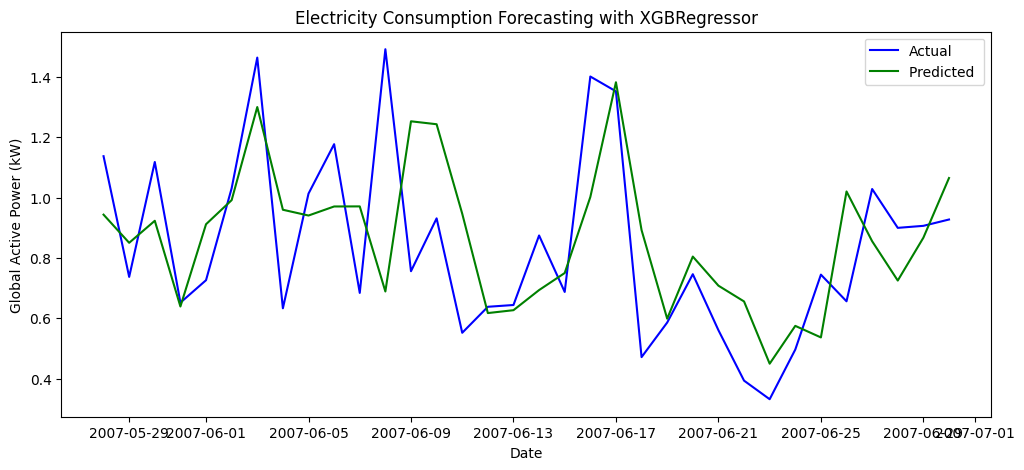

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df_daily['Datetime'].iloc[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(df_daily['Datetime'].iloc[-len(y_test):], y_pred_xgb, label='Predicted ', color='green')
plt.title("Electricity Consumption Forecasting with XGBRegressor")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()

In [27]:


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Dictionary to store results
results = {}

# ---- Linear Regression ----
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
}

# ---- Random Forest ----
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
}

# ---- XGBoost (Optional, requires pip install xgboost) ----
try:
    from xgboost import XGBRegressor
    xgb = XGBRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    )
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    results['XGBoost'] = {
        'MAE': mean_absolute_error(y_test, y_pred_xgb),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    }
except ImportError:
    print("XGBoost not installed. Skipping XGBoost model.")

# =========================
# Display Results
# =========================
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE      RMSE
Linear Regression  0.233633  0.282327
Random Forest      0.206096  0.255817
XGBoost            0.197304  0.258889
